# Hyperparameter Tuning and Pruning in Decision Trees - Lab

## Introduction

In this lab, you will use the titanic dataset to see the impact of tree pruning and hyperparameter tuning on the predictive performance of a decision tree classifier. Pruning reduces the size of decision trees by removing nodes of the tree that do not provide much predictive power to classify instances. Decision trees are the most susceptible out of all the machine learning algorithms to overfitting and effective pruning can reduce this likelihood. 

## Objectives

In this lab you will: 

- Determine the optimal hyperparameters for a decision tree model and evaluate the model performance

## Import necessary libraries

Let's first import the libraries you'll need for this lab. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn')

## Import the data

The titanic dataset, available in `'titanic.csv'`, is all cleaned up and preprocessed for you so that you can focus on pruning and optimization. Import the dataset and print the first five rows of the data: 

In [2]:
# Import the data
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,1,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0
1,2,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,1
2,3,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,1
3,4,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,1
4,5,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0


## Create training and test sets

- Assign the `'Survived'` column to `y` 
- Drop the `'Survived'` and `'PassengerId'` columns from `df`, and assign the resulting DataFrame to `X` 
- Split `X` and `y` into training and test sets. Assign 30% to the test set and set the `random_state` to `SEED` 

In [3]:
# Create X and y 
y = df['Survived']
X = df.drop(['Survived', 'PassengerId'], axis=1)

# Split into training and test sets
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

## Train a vanilla classifier

__Note:__ The term "vanilla" is used for a machine learning algorithm with its default settings (no tweaking/tuning).

- Instantiate a decision tree 
  - Use the `'entropy'` criterion and set the `random_state` to `SEED` 
- Fit this classifier to the training data 

In [4]:
# Train the classifier using training data
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = SEED)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

## Make predictions 
- Create a set of predictions using the test set 
- Using `y_test` and `y_pred`, calculate the AUC (Area under the curve) to check the predictive performance

In [5]:
# Make predictions using test set 
y_pred = dt.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7367718101733446

## Maximum Tree Depth

Let's first check for the best depth parameter for our decision tree: 

- Create an array for `max_depth` values ranging from 1 - 32  
- In a loop, train the classifier for each depth value (32 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results 

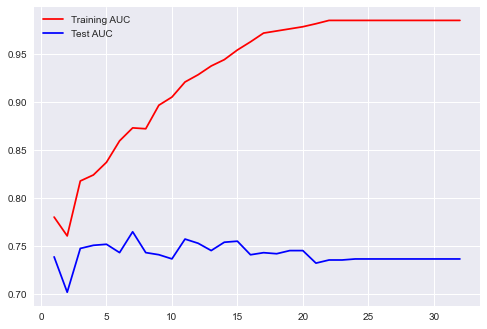

In [9]:
# Identify the optimal tree depth for given data
max_depth = np.linspace(1, 32, 32)
train_aucs = []
test_aucs = []

for depth in max_depth:
    # instantiate decision tree with given max depth
    dt_temp = DecisionTreeClassifier(criterion = 'entropy', random_state = SEED,\
                                    max_depth = depth)
    # fit to training data
    dt_temp.fit(X_train, y_train)
    
    # get train auc
    # make predictions on training data to determine auc score
    y_preds_train = dt_temp.predict(X_train)
    # get true and false positive rates
    fpr, tpr, thresholds = roc_curve(y_train, y_preds_train)
    # pass to auc score function & append result to scores list
    train_aucs.append(auc(fpr, tpr))
    
    # get test auc
    # make predictions on testing data to determine auc score
    y_preds_test = dt_temp.predict(X_test)
    # get true and false positive rates
    fpr, tpr, thresholds = roc_curve(y_test, y_preds_test)
    # pass to auc score function & append result to scores list
    test_aucs.append(auc(fpr, tpr))
    
fig, ax = plt.subplots()

ax.plot(max_depth, train_aucs, label = 'Training AUC', color = 'r')
ax.plot(max_depth, test_aucs, label = 'Test AUC', color = 'b')
ax.legend();

In [ ]:
# Your observations here 
# The AUC score for the test set doesn't ever get any better than it does when depth = 7.

## Minimum Sample Split

Now check for the best `min_samples_splits` parameter for our decision tree 

- Create an array for `min_sample_splits` values ranging from 0.1 - 1 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_splits` value (10 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

In [16]:
# make a little function to compute auc
def get_auc(model):
    # get predictions for training and testing sets
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)

    # pass to roc curve to get fpr and tpr
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_hat_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_hat_test)
    
    # get auc scores for train and test
    return auc(fpr_train, tpr_train), auc(fpr_test, tpr_test)

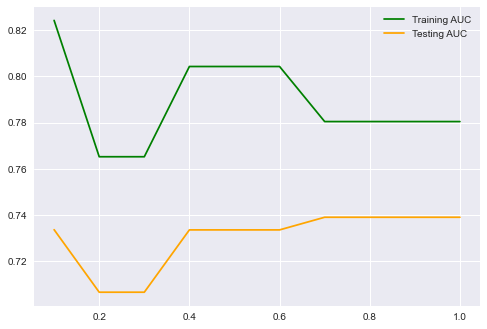

In [18]:
# Identify the optimal min-samples-split for given data
min_sample_splits = np.linspace(0.1, 1, 10)
train_aucs = []
test_aucs = []

for min_split in min_sample_splits:
    # instantiate model with min_sample_splits
    dt3 = DecisionTreeClassifier(criterion = 'entropy', random_state = SEED,\
                                 min_samples_split = min_split)
    # fit to training data
    dt3.fit(X_train, y_train)
    # pass to get_auc function to get auc scores
    train_auc, test_auc = get_auc(dt3)
    
    # store results
    train_aucs.append(train_auc)
    test_aucs.append(test_auc)
    
fig, ax = plt.subplots()

ax.plot(min_sample_splits, train_aucs, color = 'green', label = 'Training AUC')
ax.plot(min_sample_splits, test_aucs, color = 'orange', label = 'Testing AUC')
ax.legend();

In [ ]:
# Your observations here
# I would go with a min_samples_split value of 0.7 because you get maximum testing AUC score.

## Minimum Sample Leafs

Now check for the best `min_samples_leafs` parameter value for our decision tree 

- Create an array for `min_samples_leafs` values ranging from 0.1 - 0.5 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_leafs` value (5 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

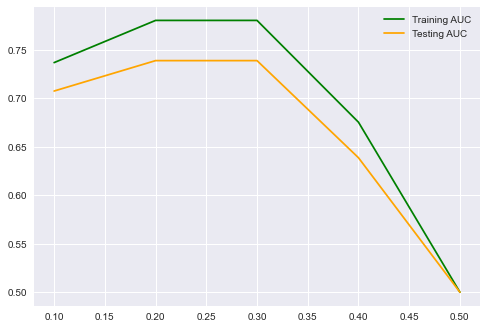

In [20]:
# Calculate the optimal value for minimum sample leafs
# Identify the optimal min-samples-split for given data
min_samples_leafs = np.linspace(0.1, 0.5, 5)
train_aucs = []
test_aucs = []

for min_leaf_size in min_samples_leafs:
    # instantiate model with min_samples_leaf of min_leaf_size
    dt4 = DecisionTreeClassifier(criterion = 'entropy', random_state = SEED,\
                                 min_samples_leaf = min_leaf_size)
    # fit to training data
    dt4.fit(X_train, y_train)
    # pass to get_auc function to get auc scores
    train_auc, test_auc = get_auc(dt4)
    
    # store results
    train_aucs.append(train_auc)
    test_aucs.append(test_auc)
    
fig, ax = plt.subplots()

ax.plot(min_samples_leafs, train_aucs, color = 'green', label = 'Training AUC')
ax.plot(min_samples_leafs, test_aucs, color = 'orange', label = 'Testing AUC')
ax.legend();

In [ ]:
# Your observations here 
# The training and test AUC scores reach their maximum at 0.2, flatline, then decrease.

## Maximum Features

Now check for the best `max_features` parameter value for our decision tree 

- Create an array for `max_features` values ranging from 1 - 12 (1 feature vs all)
- In a loop, train the classifier for each `max_features` value (12 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

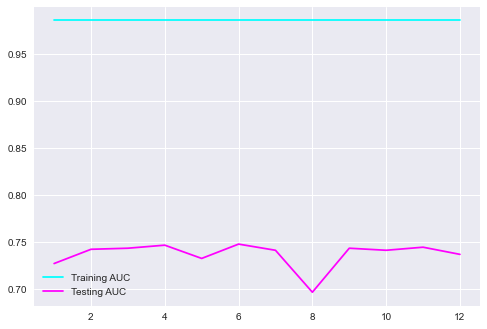

In [22]:
# Find the best value for optimal maximum feature size
# Identify the optimal min-samples-split for given data
max_features = list(range(1, 13))
train_aucs = []
test_aucs = []

for max_feat in max_features:
    # instantiate model with max_features
    dt5 = DecisionTreeClassifier(criterion = 'entropy', random_state = SEED,\
                                 max_features = max_feat)
    # fit to training data
    dt5.fit(X_train, y_train)
    # pass to get_auc function to get auc scores
    train_auc, test_auc = get_auc(dt5)
    
    # store results
    train_aucs.append(train_auc)
    test_aucs.append(test_auc)
    
fig, ax = plt.subplots()

ax.plot(max_features, train_aucs, color = 'cyan', label = 'Training AUC')
ax.plot(max_features, test_aucs, color = 'magenta', label = 'Testing AUC')
ax.legend();

In [ ]:
# Your observations here
# this is an unexpected result - the model has a perfect AUC score on the training data for
# all different values of max features - what is going on with this?
# the AUC score doesn't get much better than around 0.75 for max_features of 2 to 4.
# what a strange plot. I'd like to understand why it is so different from the others.

## Re-train the classifier with chosen values

Now we will use the best values from each training phase above and feed it back to our classifier. Then we can see if there is any improvement in predictive performance. 

- Train the classifier with the optimal values identified 
- Compare the AUC of the new model with the earlier vanilla decision tree AUC 
- Interpret the results of the comparison

In [25]:
# Train a classifier with optimal values identified above
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = SEED,\
                           max_depth = 7,
                           min_samples_split = 0.7,
                           min_samples_leaf = 0.2).fit(X_train, y_train)

y_preds = dt.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7389599317988065

In [ ]:
# Your observations here
# This model is barely any better! Less than a percentage point more in terms of the AUC score.

In order to address the issue of a baseline classifier performing better than a tuned one like this, a more-sophisticated technique is called a "grid search" and this will be introduced in a future lesson.

## Summary 

In this lesson, we looked at tuning a decision tree classifier in order to avoid overfitting and increasing the generalization capabilities of the classifier. For the titanic dataset, we see that identifying optimal parameter values can result in some improvements towards predictions. This idea will be exploited further in upcoming lessons and labs. 